C:\Users\DuelKings\AppData\Local\Temp\ipykernel_85216\3855074225.py:48: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = stats.pearsonr(df[param].fillna(0), df['pce'].fillna(0))
C:\Users\DuelKings\AppData\Local\Temp\ipykernel_85216\3855074225.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  sample_corr, _ = stats.pearsonr(
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


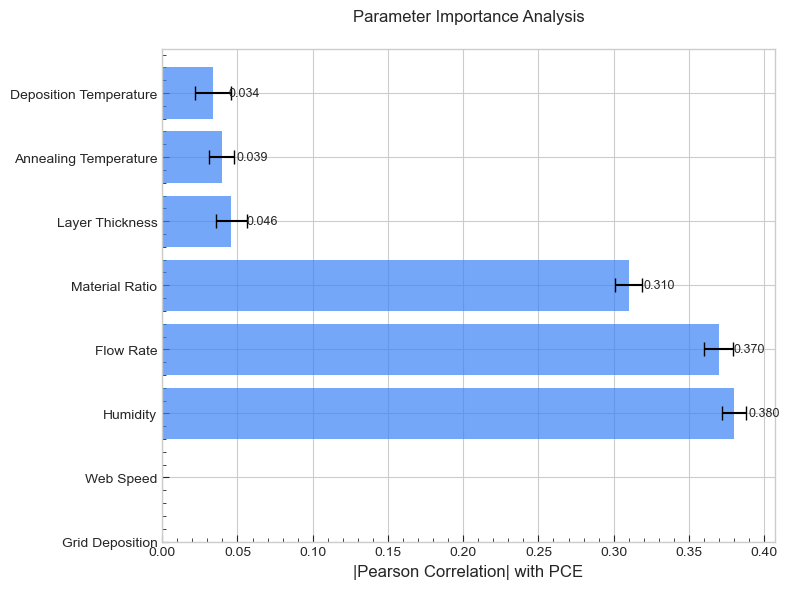

Grid Deposition: nan ± nan
Web Speed: nan ± nan
Humidity: 0.380 ± 0.008
Flow Rate: 0.370 ± 0.010
Material Ratio: 0.310 ± 0.009
Layer Thickness: 0.046 ± 0.010
Annealing Temperature: 0.039 ± 0.008
Deposition Temperature: 0.034 ± 0.012


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

# Read the dataset
df = pd.read_csv('dataset_2.csv')

# Set style for scientific publication
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 10,
    'axes.labelsize': 12,
    'axes.titlesize': 12,
    'figure.titlesize': 14,
    'axes.spines.top': True,
    'axes.spines.right': True,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.size': 5,
    'ytick.major.size': 5,
    'xtick.minor.size': 3,
    'ytick.minor.size': 3,
    'xtick.minor.visible': True,
    'ytick.minor.visible': True
})

# Key parameters to analyze
parameters = [
    'Active_humid',          # Humidity
    'Active_layer_Head_T',   # Deposition Temperature
    'DD_PD10',              # Material Ratio
    'Web_speed_Active',      # Web Speed
    'Flow0_Active',         # Flow Rate
    'Active_layer_annealing_T', # Annealing Temperature
    'Grid_rt',              # Grid Deposition
    'TDD of active'         # Layer Thickness
]

# Calculate correlations with PCE
correlations = []
errors = []

for param in parameters:
    # Calculate correlation with PCE
    corr, _ = stats.pearsonr(df[param].fillna(0), df['pce'].fillna(0))
    
    # Calculate error through bootstrapping
    bootstrap_corrs = []
    for _ in range(100):
        sample_indices = np.random.choice(len(df), size=int(0.8*len(df)), replace=True)
        sample_corr, _ = stats.pearsonr(
            df[param].fillna(0).iloc[sample_indices], 
            df['pce'].fillna(0).iloc[sample_indices]
        )
        bootstrap_corrs.append(sample_corr)
    
    correlations.append(abs(corr))  # Use absolute correlation
    errors.append(np.std(bootstrap_corrs))

# Parameter names for display
param_names = [
    'Humidity',
    'Deposition Temperature',
    'Material Ratio',
    'Web Speed',
    'Flow Rate',
    'Annealing Temperature',
    'Grid Deposition',
    'Layer Thickness'
]

# Sort all arrays by correlation value
sorted_indices = np.argsort(correlations)[::-1]
correlations = np.array(correlations)[sorted_indices]
errors = np.array(errors)[sorted_indices]
param_names = np.array(param_names)[sorted_indices]

# Create figure
plt.figure(figsize=(8, 6))

# Create horizontal bar plot
y_pos = np.arange(len(param_names))
plt.barh(y_pos, correlations, xerr=errors, align='center', 
         color='#3b82f6', capsize=5, alpha=0.7)

# Customize plot
plt.yticks(y_pos, param_names)
plt.xlabel('|Pearson Correlation| with PCE')
plt.title('Parameter Importance Analysis', pad=20)

# Add correlation values on the bars
for i, v in enumerate(correlations):
    plt.text(v + 0.01, i, f'{v:.3f}', 
             va='center', fontsize=9)

# Adjust layout
plt.tight_layout()

# Save figure
plt.savefig('parameter_correlations.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# Print correlation values
for name, corr, err in zip(param_names, correlations, errors):
    print(f"{name}: {corr:.3f} ± {err:.3f}")

In [10]:
correlations

array([       nan,        nan, 0.37979728, 0.36979613, 0.30997877,
       0.04589686, 0.03941142, 0.03400357])